In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Problem Deutscha

Problem Deutscha polega na określeniu, korzystając z wyroczni, czy dana funkcja f jest stała czy też zmienna (i w ilu krokach jesteśmy w stanie to sprawdzić). Funkcja wejściowa w podstawowym problemie jest jedną z 4 podstawowych funkcji, podanych w tabelce (problem można również uogólnić).

Cztery bramki obliczeniowe Uf pokazane będą w podrozdziałach poniżej, pomiędzy dwoma barierami w obwodzie, obłożone bramkami H (bramka X przed pierwszą barierą służy do ustalenia stanu wejściowego). Bramki F0 i F3 odpowiadają funkcjom stałym a bramki F1 i F2 - odpowiednim funkcjom zmiennym. 

Wynik (tj. odpowiedź czy funkcja jest stała czy zmienna) otrzymujemy na qubicie q0 (który jest wejściem dla naszej funkcji), mierzonym na klasycznym bicie c0. Wartość bitu równa 0 oznacza, że wejściowa funkcja jest stała a wartość 1, że funkcja jest zmienna. Wynik zgadza się z oczekiwanym. 

Wyniki na symulatorze i komputerze kwantowym są praktycznie takie same, jednak na komputerze kwantowym, jak zawsze, wyniki obarczone są pewnym błędem. 

In [2]:
def f0(circuit):
    pass

def f1(circuit):
    circuit.cx(0, 1)

def f2(circuit):
    circuit.x(1)
    circuit.cx(0, 1)

def f3(circuit):
    circuit.x(1)

In [3]:
def sandwich(circuit, qbits, inside):
    for i in qbits:
        circuit.h(i)
    inside(circuit)
    for i in qbits:
        circuit.h(i)

### Bramka F0

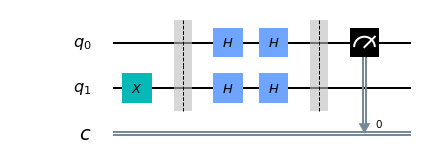

In [4]:
circ = QuantumCircuit(2, 1)
circ.x(1)
circ.barrier()
sandwich(circ, [0, 1], f0)
circ.barrier()
circ.measure(0,0)
circ.draw()

Simulator {'0': 1024}
Experiment {'1': 2, '0': 1022}


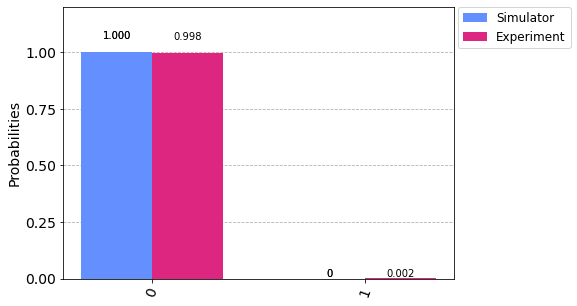

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_rome')

job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wynik z symulatora oraz z komputera kwantowego pokazuje, że funkcja wejściowa jest stała, co jest prawdą (funkcja f0, zwraca 0 niezależnie od wejścia q0). Błąd komputera kwantowego jest niewielki (bo na qubicie q0 po transpilacji nie znajduje się żadna bramka)

### Bramka F1

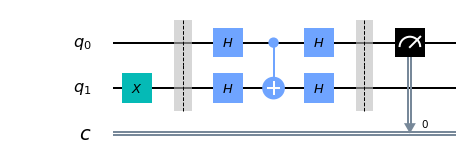

In [6]:
circ = QuantumCircuit(2, 1)
circ.x(1)
circ.barrier()
sandwich(circ, [0, 1], f1)
circ.barrier()
circ.measure(0,0)
circ.draw()

Simulator {'1': 1024}
Experiment {'1': 932, '0': 92}


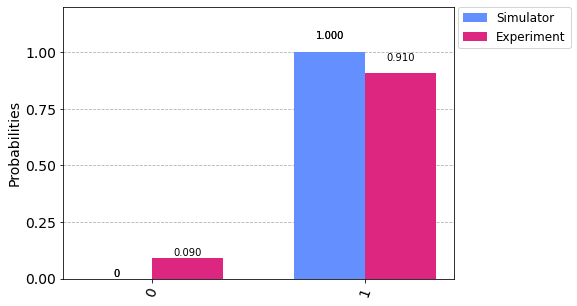

In [7]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wynik z symulatora oraz z komputera kwantowego pokazuje, że funkcja wejściowa jest zmienna, co jest prawdą (funkcja f1, zwraca 0 dla wejścia równego 0 oraz 1 dla wejścia równego 1). Błąd komputera kwantowego jest niewielki, większy jednak niż przy bramce f0. Prawdopodobnie ma na to wpływ większa liczba bramek kwantowych w obwodzie (po transpilacji obwodu na mierzonym qubicie q0 znajdują się odpowiednie bramki)

### Bramka F2

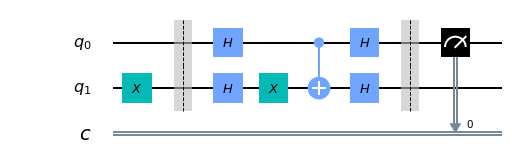

In [8]:
circ = QuantumCircuit(2, 1)
circ.x(1)
circ.barrier()
sandwich(circ, [0, 1], f2)
circ.barrier()
circ.measure(0,0)
circ.draw()

Simulator {'1': 1024}
Experiment {'1': 935, '0': 89}


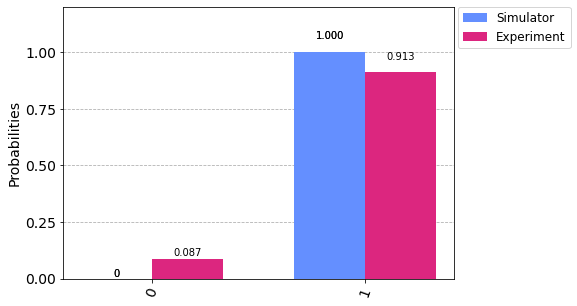

In [9]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wynik z symulatora oraz z komputera kwantowego pokazuje, że funkcja wejściowa jest zmienna, co jest prawdą (funkcja f2, zwraca 1 dla wejścia równego 0 oraz 0 dla wejścia równego 1). Błąd komputera kwantowego jest podobny jak przy bramce f1.

### Bramka F3

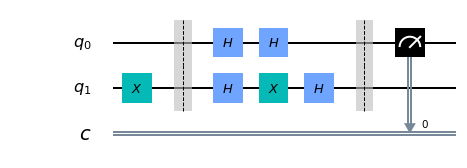

In [10]:
circ = QuantumCircuit(2, 1)
circ.x(1)
circ.barrier()
sandwich(circ, [0, 1], f3)
circ.barrier()
circ.measure(0,0)
circ.draw()

Simulator {'0': 1024}
Experiment {'1': 5, '0': 1019}


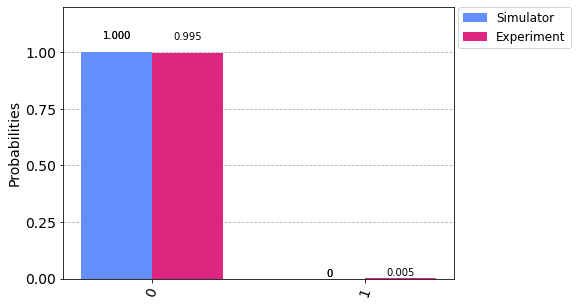

In [11]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wynik z symulatora oraz z komputera kwantowego pokazuje, że funkcja wejściowa jest stała, co jest prawdą (funkcja f3, zwraca 1 niezależnie od wejścia q0). Błąd komputera kwantowego jest niewielki (bo na qubicie q0 po transpilacji nie znajduje się żadna bramka)

## Problem Bernsteina-Vaziraniego

Problem Bernsteina-Vaziraniego polega na znalezieniu wartości parametru `a`  podanej funkcji `f`, używając wyroczni.

Bramka Uf znajduje się pomiędzy dwoma barierami w obwodzie (w przypadku rozwiązania kwantowego jest ona obłożona bramkami H), bramki X przed pierwszą barierą służą do ustalenia stanu wejściowego.

Rozwiązanie klasyczne realizujemy ustawiając nasze wejście (qubity od q0 do q2) na kolejne maski bitowe i odczytując pojedynczo wartość każdego bitu parametru `a` na qubicie wyjściowym q3 (dla lepszej czytelności układ ma tylko 3 bity wejściowe oraz każde ustawienie bitu wejściowego pokazane jest na osobnym obwodzie). 

Rozwiązanie kwantowe polega na obłożeniu bramkami H całej bramki Uf, co powoduje, że wewnętrzne bramki CNOT są teraz sterowane qubitem wyjścia q3, czyli jeśli qubit wyjścia q3 ustawimy na |1> a qubity wejścia (od q0 do q2) na |0>, to odpowiednie qubity wejścia zostaną zamienione na |1>, jeśli sterowały one wcześniej bramkami CNOT. W ten sposób na wszystkich qubitach wejściowych od q0 do q2 otrzymamy wartość parametru `a`. 

Wyniki na symulatorze i komputerze kwantowym są praktycznie takie same, jednak na komputerze kwantowym, jak zawsze, wyniki obarczone są pewnym błędem. 

In [20]:
def Uf(circ):
    circ.cx(0,3)
    circ.cx(2,3)

#### Rozwiązanie klasyczne

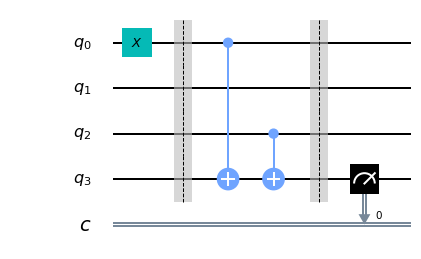

In [32]:
circ = QuantumCircuit(4, 1)
circ.x(0)
circ.barrier()
Uf(circ)
circ.barrier()
circ.measure(3, 0)
circ.draw()

Simulator {'1': 1024}
Experiment {'1': 877, '0': 147}


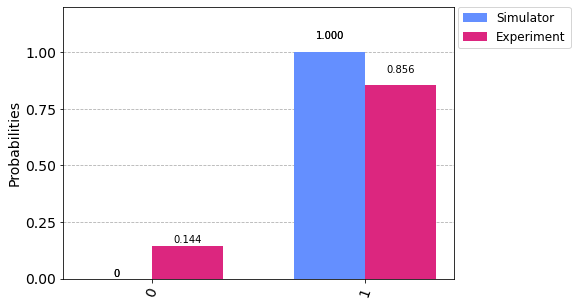

In [33]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wartość bitu 2 parametru `a` jest równa 1. Wynik na symulatorze oraz komputerze kwantowym jest podobny, na komputerze kwantowym obserwujemy pewien błąd

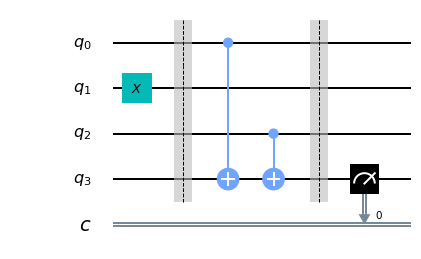

In [26]:
circ = QuantumCircuit(4, 1)
circ.x(1)
circ.barrier()
Uf(circ)
circ.barrier()
circ.measure(3, 0)
circ.draw()

Simulator {'0': 1024}
Experiment {'1': 119, '0': 905}


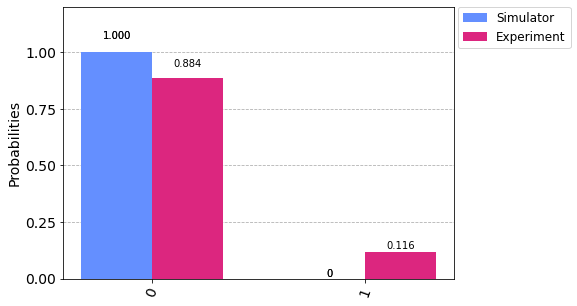

In [27]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wartość bitu 1 parametru `a` jest równa 0. Wynik na symulatorze oraz komputerze kwantowym jest podobny, na komputerze kwantowym obserwujemy pewien błąd

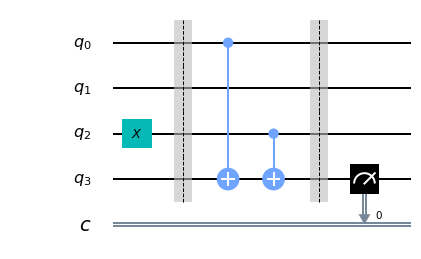

In [28]:
circ = QuantumCircuit(4, 1)
circ.x(2)
circ.barrier()
Uf(circ)
circ.barrier()
circ.measure(3, 0)
circ.draw()

Simulator {'1': 1024}
Experiment {'1': 889, '0': 135}


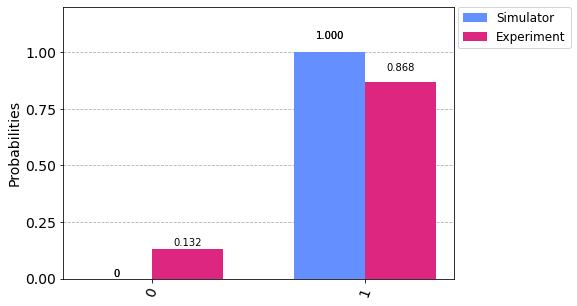

In [29]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

Wartość bitu 0 parametru `a` wynosi 1. Wynik na symulatorze oraz komputerze kwantowym jest podobny, na komputerze kwantowym obserwujemy pewien błąd

Z podejścia klasycznego otrzymujemy wartość parametru `a` równą 101, co jest zgodne ze stworzonym obwodem.

Błąd na komputerze kwantowym jest bardzo podobny w każdym z obwodów, wynika więc prawdopodobnie z błędów na bramkach.

#### Rozwiązanie kwantowe

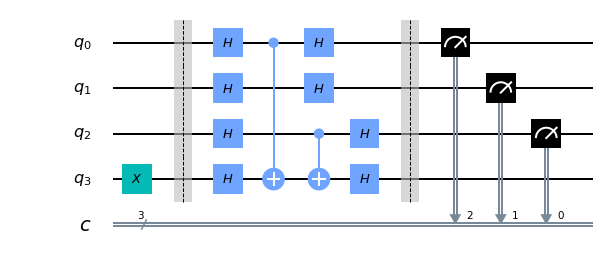

In [37]:
circ = QuantumCircuit(4, 3)
circ.x(3)
circ.barrier()
sandwich(circ, [0,1,2,3], Uf)
circ.barrier()
circ.measure([0,1,2], [2,1,0])
circ.draw()

Simulator {'101': 1024}
Experiment {'100': 63, '101': 614, '001': 219, '111': 38, '010': 7, '011': 46, '000': 34, '110': 3}


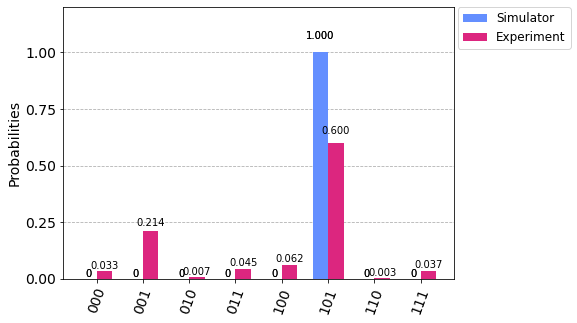

In [38]:
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
job_exp = execute(circ, backend=backend)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
print("Simulator", counts)
print("Experiment", counts_exp)
legend = ['Simulator', 'Experiment']
plot_histogram([counts, counts_exp], legend=legend)

W rozwiązaniu kwantowym wartość parametru `a` równą 101 otrzymujemy już po jednym wykonaniu obwodu. Wynik na symulatorze oraz komputerze kwantowym jest podobny, na komputerze kwantowym obserwujemy spodziewany błąd

Wyniki otrzymane z podejścia klasycznego oraz kwantowego są takie same, jednak w podejściu klasycznym liczba kroków potrzebna do otrzymania rozwiązania jest liniowa w stosunku do długości wejścia a w podejściu kwantowym jest to zawsze jeden krok